In [2]:
from google.colab import drive


drive.mount("/content/drive")

Mounted at /content/drive


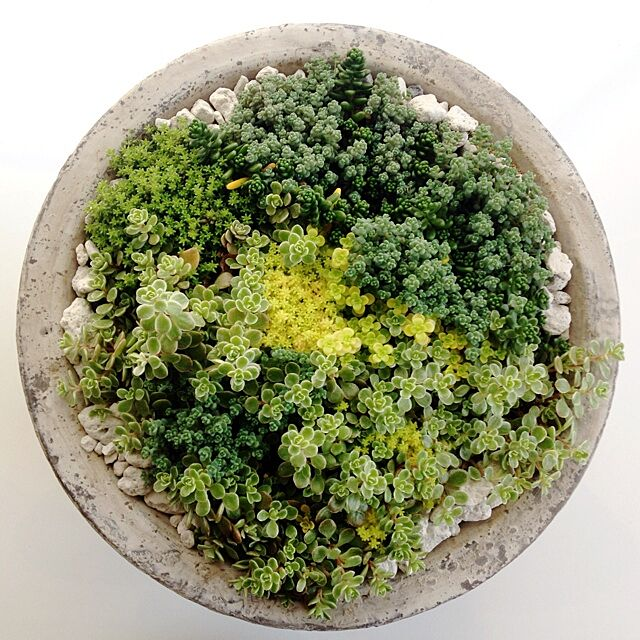

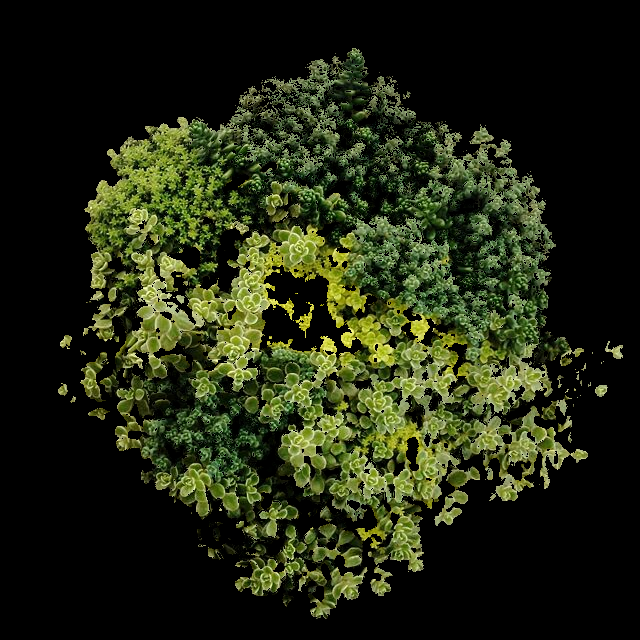

green ratio: 0.38301513671875


In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


BLACK = [0, 0, 0]

def extract_green(img):
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  lower_green = np.array([30, 64, 0])
  upper_green = np.array([90, 255, 255])

  mask = cv2.inRange(hsv, lower_green, upper_green)
  masked_image = cv2.bitwise_and(img, img, mask=mask)

  return masked_image, mask

def get_green_ratio(img):
  image_area = img.shape[0] * img.shape[1]

  masked_image, _ = extract_green(img)
  green_area = (masked_image != BLACK).any(axis=2).sum()

  green_ratio = green_area / image_area
  return green_ratio

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/Research/Other Modules/Extract Green/sample.jpg")
cv2_imshow(img)

masked_image, _ = extract_green(img)
cv2_imshow(masked_image)

print("green ratio:", get_green_ratio(img))